## **Problem Statement**

### **Introduction**
Fake news has emerged as one of the most significant challenges of our time, severely impacting both online and offline discourse. Its proliferation poses a direct threat to the democratic processes and societal stability, particularly in the western world. The ability to accurately identify and reduce the spread of fake news is essential to maintaining informed public discourse and safeguarding democratic institutions.

### **Problem Statement**
The primary challenge addressed by this project is the automatic detection of fake news articles using machine learning and natural language processing (NLP) techniques. By developing a reliable model to classify news articles as either fake or real, we aim to contribute to the efforts to curb the spread of misinformation and enhance the quality of information available to the public.

### **Aim of the Project**

The aim of this project is to build a robust and accurate fake news detection system.

### **How Does the Solution Solve the Problem?**

The proposed solution involves developing a machine learning model that leverages NLP and deep learning techniques to classify news articles as fake or real, allowing users to input news articles and classify them as fake or real, thereby providing a valuable tool for combating misinformation.


### **About the Dataset**

The dataset used in this project contains labeled news articles, categorized as either fake or real. This dataset is essential for training and evaluating the machine learning models developed to detect fake news.

### **Content**
The dataset comprises rows and columns that represent various attributes of news articles, including their textual content and labels indicating whether they are fake or real. The dataset includes information on how it was acquired and the time period it represents, providing valuable context for the analysis.




In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import spacy

In [60]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NLP/fake_or_real_news.csv', usecols=lambda col: col if 'Unnamed' not in col else None)


In [61]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [62]:
df['input_text'] = df['title'] + ' ' + df['text']

In [63]:
df.head()

,title,text,label,input_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


## **Machine Learning Task Instructions**

In this task, you will work with the provided `input_text` variable. Your objective is to apply any machine learning algorithm to process the data and achieve meaningful results.

### **Steps to Follow:**

1. **Preprocess the Data**: Clean and preprocess the `input_text` data as necessary. This might include actions such as tokenization, removing stop words, and lemmatization.

2. **Extract Features**: Transform the text data into numerical features suitable for machine learning algorithms. Consider using techniques like `TfidfVectorizer` or `CountVectorizer`.

3. **Select a Machine Learning Algorithm**: Choose an appropriate machine learning algorithm for your task. Options include classification algorithms (e.g., Logistic Regression, SVM, Random Forest, and others).

4. **Train Your Model**: Split your data into training and testing sets, then train your chosen model on the preprocessed data.

5. **Evaluate Your Model**: Measure the performance of your model using suitable metrics (e.g., accuracy, precision, recall, F1-score).

Good luck!


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       6335 non-null   object
 1   text        6335 non-null   object
 2   label       6335 non-null   object
 3   input_text  6335 non-null   object
dtypes: object(4)
memory usage: 198.1+ KB


In [65]:
#input
df.input_text

0       You Can Smell Hillary’s Fear Daniel Greenfield...
1       Watch The Exact Moment Paul Ryan Committed Pol...
2       Kerry to go to Paris in gesture of sympathy U....
3       Bernie supporters on Twitter erupt in anger ag...
4       The Battle of New York: Why This Primary Matte...
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: input_text, Length: 6335, dtype: object

In [66]:
#Target
df.label.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [67]:
#Initialize spacy
nlp = spacy.load("en_core_web_sm", disable=['parser','ner'])

In [68]:
#Function to preprocess text
def spacy_tokenizer(sentence):
  tokens = nlp(sentence)
  #lemmatization
  tokens = [token.lemma_.lower().strip() if token.lemma_ != '-PRON-' else token.lower_ for token in tokens]
  #removal of stop words
  tokens = [token for token in tokens if token not in nlp.Defaults.stop_words]
  return " ".join(tokens)

In [69]:
#preprocessing the input
df['input_text'] = df['input_text'].apply(spacy_tokenizer)

In [70]:
df['label'] = df['label']. apply(lambda x: 1 if x == 'REAL' else 0)

In [71]:
df.label.value_counts()

label
1    3171
0    3164
Name: count, dtype: int64

In [72]:
#assign input and target
X = df['input_text']
y = df['label']

In [73]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [74]:
#Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
#machine learning algorithm
clf = MultinomialNB()

In [78]:
clf.fit(X_train,y_train)

MultinomialNB()

In [79]:
y_pred = clf.predict(X_test)

In [80]:
accuracy = accuracy_score(y_test,y_pred)

In [82]:
print(accuracy)

0.8980021030494216


In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
#Machine learning algorithm
log = LogisticRegression()

In [85]:
log.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
y_pred = log.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test,y_pred)

In [88]:
print(accuracy)

0.9221871713985279


In [89]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [91]:
print(conf_matrix)

[[426  33]
 [ 41 451]]


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

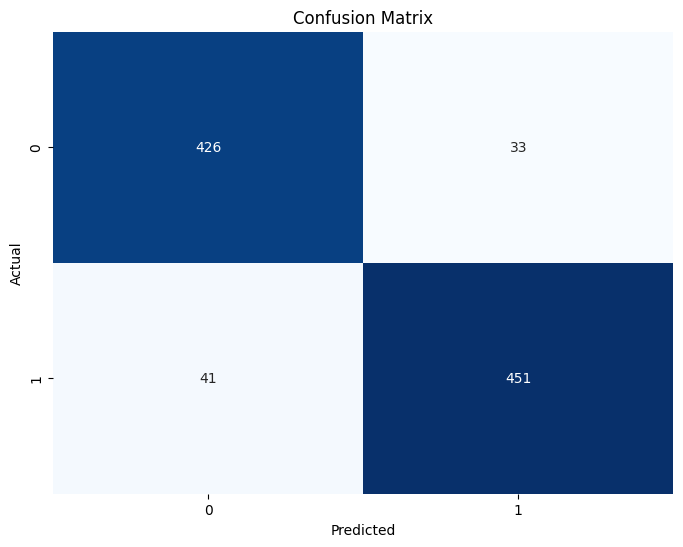

In [96]:
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


In [97]:
from sklearn.tree import DecisionTreeClassifier


In [98]:
DTC = DecisionTreeClassifier()

In [99]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [100]:
y_pred = DTC.predict(X_test)

In [101]:
accuracy = accuracy_score(y_test,y_pred)

In [102]:
print(accuracy)

0.8222923238696109


In [103]:
import pickle

In [106]:
# Saving the model to a file
pickle_file = 'logistic_regression_model.pkl'
with open(pickle_file, 'wb') as file:
    pickle.dump(log, file)

#Load the model from the file
with open(pickle_file, 'rb') as file:
    loaded_log = pickle.load(file)

#Evaluate the model
y_pred = loaded_log.predict(X_test)
y_pred_prob = loaded_log.predict_proba(X_test)[:,1]

#Print Accuracy
accuracy = round(accuracy_score(y_test, y_pred),2)
print(accuracy)

0.92
